<a href="https://colab.research.google.com/github/PepoAmbriz/Inferencia-Bayesiana-en-Cosmolog-a/blob/main/P3_Cosmology_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 3 de cosmología: Inferencia Bayesiana.**

José Francisco Ambriz Gutiérrez

Metropolis-Hasting algorithm

In [ ]:
import numpy as np
import scipy as sy
import matplotlib.pyplot as plt
import random 
import pandas as pd
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install CosmoloPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from astropy.cosmology import FlatLambdaCDM
import cosmolopy.distance as cd
from scipy.stats import norm

For the Likelihood i use
$$Likelihood=\prod_i^n \frac{1}{2\pi\sigma_i^2}exp(-\frac{(\mu_i-\mu(model))^2}{2\sigma^2_i})$$

And the posterior is 
$$Ln(Pos)=Ln(Likelihood)+Ln(Prior)$$

In [ ]:


#Likelihood function ln
def likelihood(muexp,sigma,z,theta,mu):
  L =np.sum( -0.5*((muexp-mu(z,theta))/(sigma))**2 - np.log(2*np.pi*sigma**2) )
  return L

#Prior box function ln
def prior(theta,limits):
  p=np.zeros(len(theta))
  for i in range(len(theta)):
    if(theta[i]<limits[i][1] and limits[i][0]<theta[i]):
      p[i]=-np.log((limits[i][1]-limits[i][0]))
    else:
      p[i]=-np.inf
  return sum(p)  

#Recta 3x+3
def recta(x,pp):
  return pp[0]*x+pp[1]

array([[  0.        ,   1.        ,   2.        ,   3.        ,
          4.        ,   5.        ,   6.        ,   7.        ,
          8.        ,   9.        ,  10.        ,  11.        ,
         12.        ,  13.        ,  14.        ,  15.        ,
         16.        ,  17.        ,  18.        ,  19.        ,
         20.        ,  21.        ,  22.        ,  23.        ,
         24.        ,  25.        ,  26.        ,  27.        ,
         28.        ,  29.        ,  30.        ,  31.        ,
         32.        ,  33.        ,  34.        ,  35.        ,
         36.        ,  37.        ,  38.        ,  39.        ],
       [  3.39855831,   6.16100526,   9.35768406,  12.05693893,
         15.13517504,  18.09516492,  21.08711983,  24.32277693,
         27.42537021,  30.35882719,  33.16431161,  36.34927869,
         39.14883624,  42.40360421,  45.29399247,  48.00069712,
         51.10900765,  54.00979913,  57.25863679,  60.17640727,
         63.20658354,  66.09954284,  69

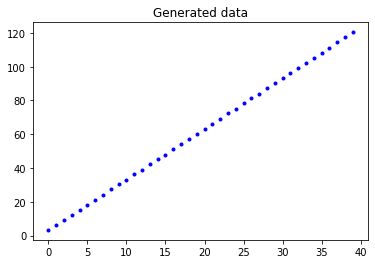

In [ ]:
#Data generator 
data_p=np.zeros((3,40))
for i in range(40):
  data_p[0][i]=i
  data_p[1][i]=3*i+3+np.random.uniform(0,0.5)
  data_p[2][i]=0.5

plt.plot(data_p[0],data_p[1],'.',color='b')
plt.title('Generated data')
data_p

In [ ]:
#Metropoli-Hasting algorithm

def MHMC(N,array,n,data_p,modelo,limits,pasos,likelihood,prior):
  thetasaved=[ [np.random.uniform(limits[0][0],limits[0][1]),np.random.uniform(limits[1][0],limits[1][1])] ] #to write mu as a parameters function
  i=-1
  #First posterior will change
  LnPost_i=likelihood(data_p[1],data_p[2],data_p[0],thetasaved[len(thetasaved)-1],modelo)+prior(thetasaved[len(thetasaved)-1],limits)
  while (i<N and len(thetasaved)<array): 
    i+=1
    #1.Start vector
    theta=thetasaved[len(thetasaved)-1]
    #2. Propose Theta_trial
    theta_trial=np.random.normal(theta,pasos)
    #3. Compute posteriors 
    if( np.exp(prior(theta_trial,limits)) == 0 ):   
      LnPostT = prior(theta_trial,limits)
      pacc=0.0
      #i-=1
    else:
      LnPostT= likelihood(data_p[1],data_p[2],data_p[0],theta_trial,modelo) + prior(theta_trial,limits)  
      razon=np.exp(LnPostT-LnPost_i)
      pacc=min( 1 ,razon )

    #print("pacc= ",razon)
    #4. Test P_acc
    if( (pacc) > np.random.uniform(0,1) ):
      thetasaved.append(theta_trial)  
      LnPost_i=LnPostT
    else:
      thetasaved.append(theta)
  params=np.zeros((n,len(thetasaved)))
  for k in range(len(thetasaved)):
    params[0][k]=thetasaved[k][0]
    params[1][k]=thetasaved[k][1]

  return params

#MHMC without the posterior evaluation
def MHMC2(N,array,n,data_p,modelo,limits,pasos,likelihood,prior):
  thetasaved=[ [np.random.uniform(limits[0][0],limits[0][1]),np.random.uniform(limits[1][0],limits[1][1])] ] #to write mu as a parameters function
  i=-1
  #First posteior
  LnPost_i=likelihood(data_p[1],data_p[2],data_p[0],thetasaved[len(thetasaved)-1],modelo)+prior(thetasaved[len(thetasaved)-1],limits)
  while (i<N and len(thetasaved)<array): 
    i+=1
    #1.Start vector
    theta=thetasaved[len(thetasaved)-1]
    #2. Propose Theta_trial 
    theta_trial=np.random.normal(theta,pasos)
    #3. Compute posteriors 
    LnPostT= likelihood(data_p[1],data_p[2],data_p[0],theta_trial,modelo) + prior(theta_trial,limits)  
    razon=np.exp(LnPostT-LnPost_i) 
    pacc=min( 1 ,razon )

    #print("pacc= ",razon)
    #4. Test P_acc
    if( (pacc) > np.random.uniform(0,1) ):
      thetasaved.append(theta_trial)  
      LnPost_i=LnPostT
  #Save params for output    
  params=np.zeros((n,len(thetasaved)))
  for k in range(len(thetasaved)):
    params[0][k]=thetasaved[k][0]
    params[1][k]=thetasaved[k][1]

  return params

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp


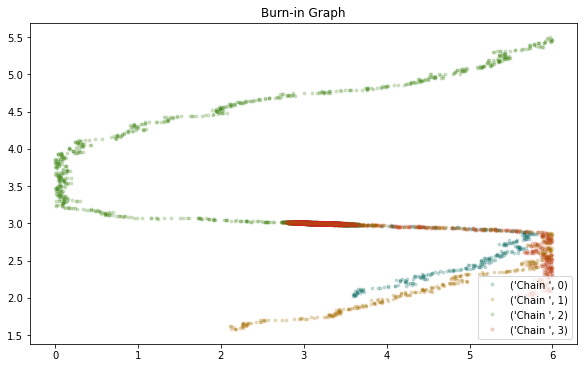

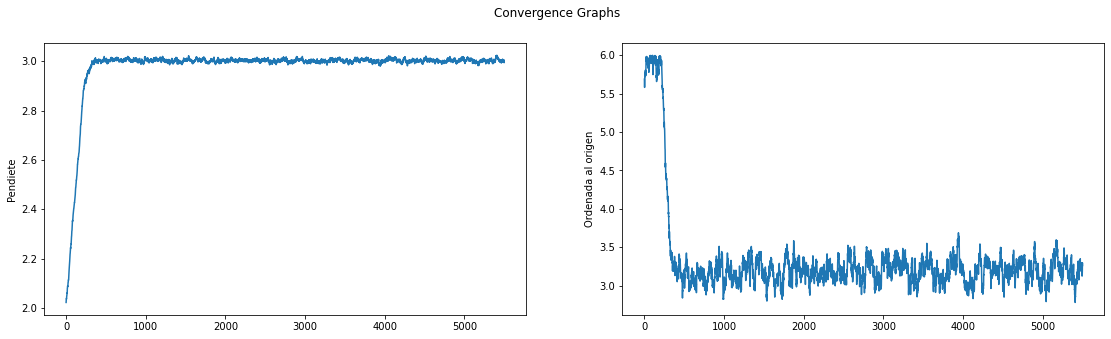

In [ ]:
#First all the variables that i will use
N=500000    #iteratons
n=2      #vector elements
limits=[[0,6],[0,6]] #limits of theta params
pasos=[0.005,0.05]
largo=5500

fig2, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
for i in range(4):
  Params=MHMC2(N,largo,n,data_p,recta,limits,pasos,likelihood,prior) 
  plt.plot(Params[1],Params[0],'.', markerfacecolor=(i/5, 0.4, 0, 0.2),label=('Chain ' ,i))

plt.title('Burn-in Graph')
plt.legend(loc = "lower right")
plt.show()

figure, axes = plt.subplots(1,2)
figure.set_size_inches(19,5)
figure.suptitle('Convergence Graphs')
x=np.arange(len(Params[0]))
axes[0].plot(x,Params[0])
axes[1].plot(x,Params[1])  

axes[0].set_ylabel("Pendiete")
axes[1].set_ylabel("Ordenada al origen")

plt.show()




We see convergence in the 1000 iterations, so using the data st this point we have.


Text(0, 0.5, 'Frecuencia')

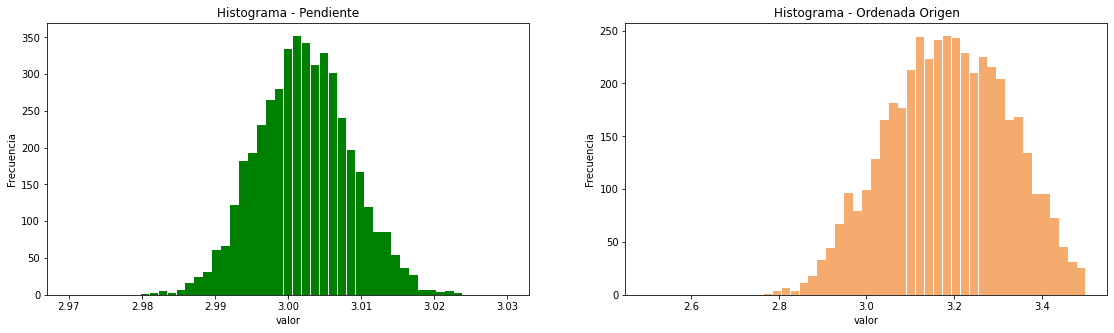

In [ ]:

histogram1=[]
histogram2=[]
for i in range(1000,largo):
  histogram1.append(Params[0][i])
  histogram2.append(Params[1][i])

intervalos =np.linspace(2.97,3.03,50) 
intervalos2 =np.linspace(2.5,3.5,50) 

figure, axes = plt.subplots(1,2)
figure.set_size_inches(19,5)
axes[0].hist(histogram1, bins=intervalos, color='green', rwidth=0.95)
axes[0].set_title('Histograma - Pendiente')
axes[0].set_xlabel('valor')
axes[0].set_ylabel('Frecuencia')
axes[1].hist(histogram2, bins=intervalos2, color='#F5AB6D', rwidth=0.95)
axes[1].set_title('Histograma - Ordenada Origen')
axes[1].set_xlabel('valor')
axes[1].set_ylabel('Frecuencia')



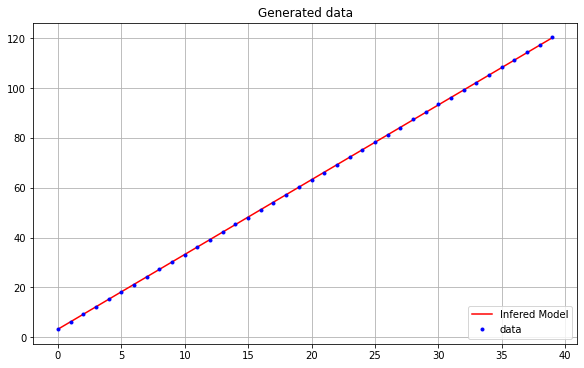

In [ ]:
#We can plot the model with infered parameters and data

fig2, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
M=[]
B=[]
for i in range(1000,len(Params[0])):
  M.append(Params[0][i])
  B.append(Params[1][i])

m=np.sum(M)/len(M)
b=np.sum(B)/len(B)

x=np.linspace(0,50,100)
plt.plot(data_p[0],m*data_p[0]+b,color='red',label="Infered Model")
plt.plot(data_p[0],data_p[1],'.',color='b',label='data')
plt.title('Generated data')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Now, i will use the distance modulus model of cosmolopy

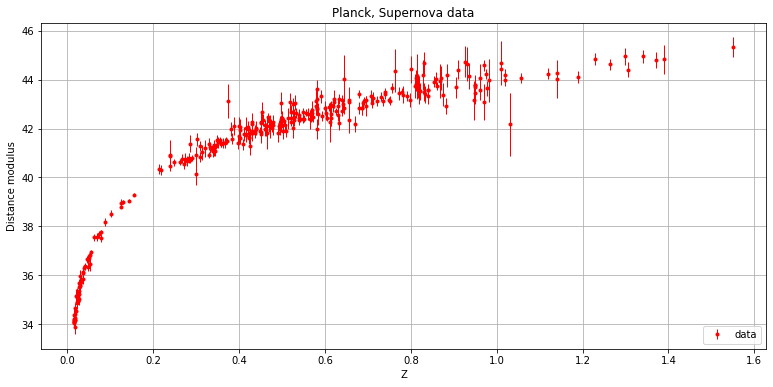

In [ ]:
#We need  a data set, i will use the super nova data discuss in project 1
data=np.loadtxt("/content/drive/MyDrive/Cosmology2022/Project3/data.txt",usecols=(1,2,3)).T #0->Z, 1->mu, 2->sigma
figure, axes = plt.subplots(1, figsize=(13,6))
plt.errorbar(data[0],data[1],yerr=data[2],fmt='.',elinewidth=1,color='red',label='data')
plt.title('Planck, Supernova data')
plt.legend(loc='lower right')
plt.ylabel('Distance modulus')
plt.xlabel('Z')
plt.grid()
plt.show()

In [ ]:
H0=67.36
Om0=0.3153
Ob0=0.02237/(H0/100)**2
OLambda=0.6847
Tcmb0=2.7255
cosmo = {'omega_M_0' : Om0, 'omega_lambda_0' : OLambda,'h' : H0/100}
cosmo = cd.set_omega_k_0(cosmo)

#Modulus distance Model 
def mu(z,theta):
  cosmo = {'omega_M_0' :theta[0], 'omega_lambda_0' : (1-theta[0]) ,'h' :theta[1]} 
  cosmo = cd.set_omega_k_0(cosmo)
  return 5.0*np.log10(cd.luminosity_distance(z, **cosmo))+25.0

In [ ]:
#Testing other likelihood definition, patadas de ahogado xd 
#Likelihood function ln
def likelihood2(muexp,sigma,z,theta,mu):
  L=0
  for i in range(len(muexp)):
    L += ( -0.5*((muexp[i]-mu(z[i],theta))/(sigma[i]))**2 - np.log(2*np.pi*sigma[i]**2) )
  return L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


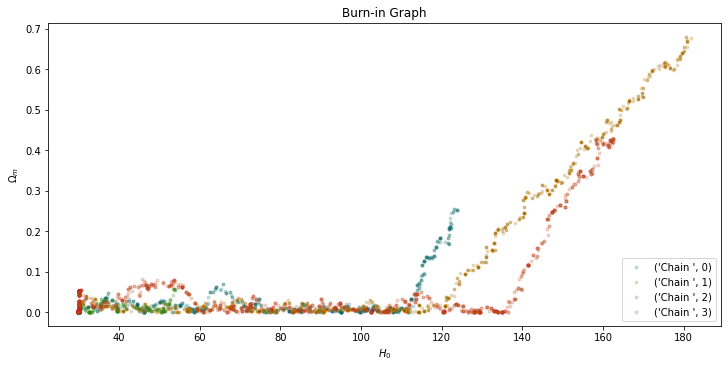

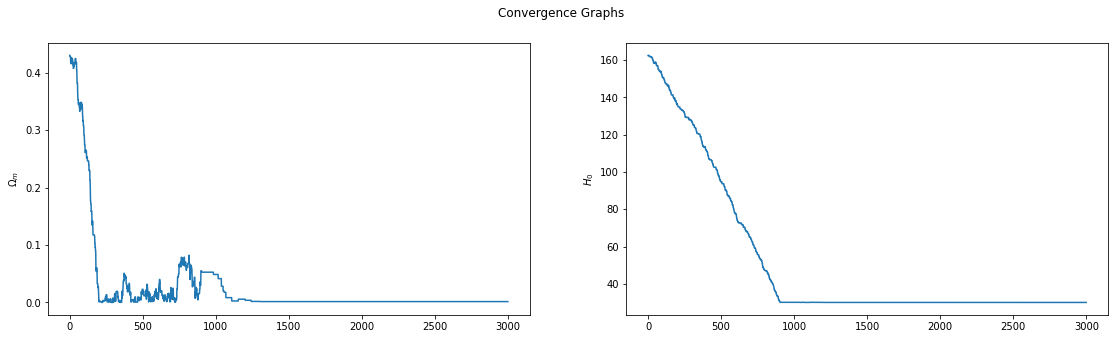

In [ ]:
#Here use MH algorithm to infer \omega_m and H because the model asumes curvature=0
#\omega_lambda= 1 - \omega_m

N=10000    #iteratons
size=3000  #Data array size
n=2        #vector elements
limits=[[0.0,1],[30,200]] #limits of theta params
pasos=[0.008,0.5]

fig2, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
for i in range(4):
  Supernova=MHMC(N,size,n,data,mu,limits,pasos,likelihood2,prior) 
  plt.plot(Supernova[1],Supernova[0],'.', markerfacecolor=(i/5, 0.4, 0, 0.2),label=('Chain ' ,i))

plt.title('Burn-in Graph')
plt.legend(loc = "lower right")
plt.ylabel('$\Omega_m$')
plt.xlabel('$H_0$')
plt.show()

figure, axes = plt.subplots(1,2)
figure.set_size_inches(19,5)
figure.suptitle('Convergence Graphs')
x=np.arange(len(Supernova[0]))
axes[0].plot(x,Supernova[0])
axes[1].plot(x,Supernova[1])  

axes[0].set_ylabel("$\Omega_m$")
axes[1].set_ylabel("$H_0$")

plt.show()




We dont see convergence xd ☹, i have vacation work, maybe is the model, i will search other.

Text(0, 0.5, 'Frecuencia')

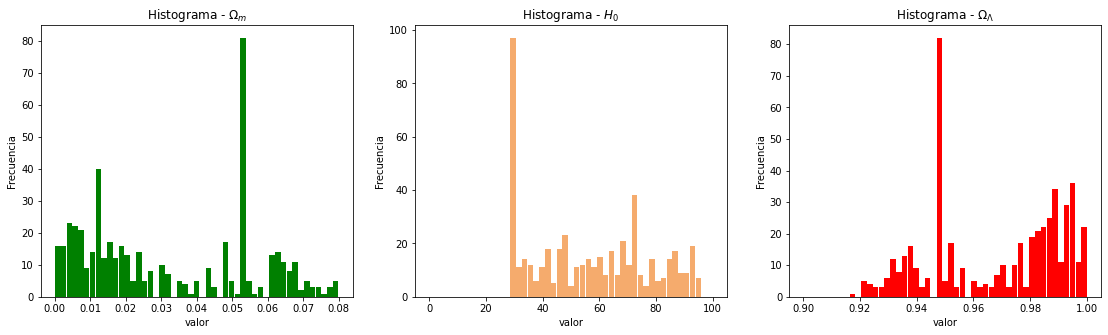

In [ ]:

histogram1=[]
histogram2=[]
histogram3=[]
for i in range(500,1000):#Suppose that converges here
  histogram1.append(Supernova[0][i])
  histogram2.append(Supernova[1][i])
  histogram3.append(1-Supernova[0][i])

intervalos =np.linspace(0,0.08,50) 
intervalos2 =np.linspace(0,100.01,50) 
intervalos3 =np.linspace(0.9,1,50) 

figure, axes = plt.subplots(1,3)
figure.set_size_inches(19,5)
axes[0].hist(histogram1, bins=intervalos, color='green', rwidth=0.95)
axes[0].set_title('Histograma - $\Omega_m$')
axes[0].set_xlabel('valor')
axes[0].set_ylabel('Frecuencia')
axes[1].hist(histogram2, bins=intervalos2, color='#F5AB6D', rwidth=0.95)
axes[1].set_title('Histograma - $H_0$')
axes[1].set_xlabel('valor')
axes[1].set_ylabel('Frecuencia')
axes[2].hist(histogram3, bins=intervalos3, color='red', rwidth=0.95)
axes[2].set_title('Histograma - $\Omega_\Lambda$')
axes[2].set_xlabel('valor')
axes[2].set_ylabel('Frecuencia')


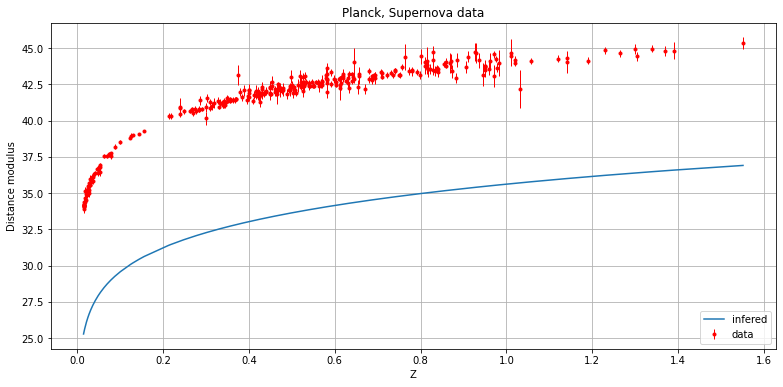

In [ ]:

omegam=[]
for i in range(500,1000):
  omegam.append(Supernova[0][i])
  

Om=np.sum(omegam)/len(omegam)
Ol=1-Om

def mu2(z):
  cosmo = {'omega_M_0' :Om, 'omega_lambda_0' : Ol ,'h' :67.36} 
  cosmo = cd.set_omega_k_0(cosmo)
  return 5.0*np.log10(cd.luminosity_distance(z, **cosmo))+25.0


figure, axes = plt.subplots(1, figsize=(13,6))

plt.errorbar(data[0],data[1],yerr=data[2],fmt='.',elinewidth=1,color='red',label='data')
data[0].sort()
plt.plot(data[0],mu2(data[0]),'-',label='infered')
plt.title('Planck, Supernova data')
plt.legend(loc='lower right')
plt.ylabel('Distance modulus')
plt.xlabel('Z')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


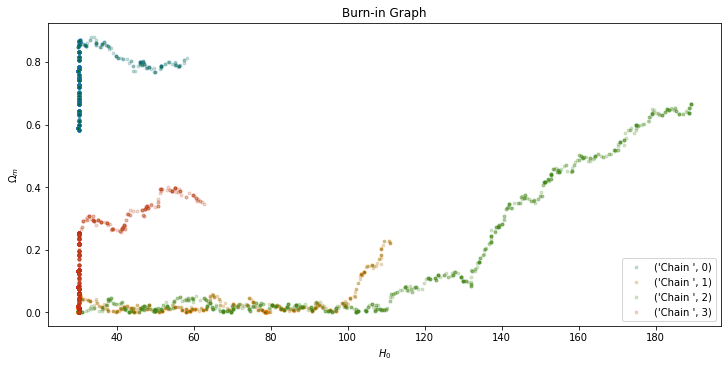

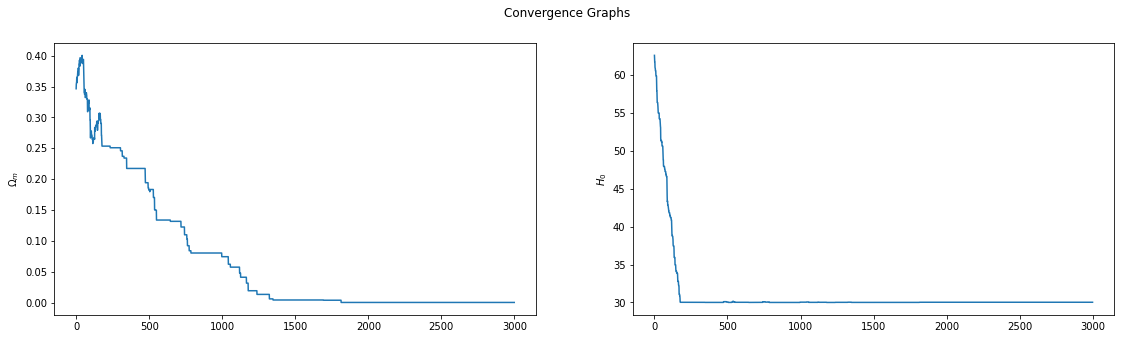

In [ ]:
#Que pasa si acomodamos los datos?

for i in range(3):
  data[i].sort()


N=10000    #iteratons
size=3000  #Data array size
n=2        #vector elements
limits=[[0.0,1],[30,200]] #limits of theta params
pasos=[0.008,0.5]

fig2, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
for i in range(4):
  Supernova=MHMC(N,size,n,data,mu,limits,pasos,likelihood2,prior) 
  plt.plot(Supernova[1],Supernova[0],'.', markerfacecolor=(i/5, 0.4, 0, 0.2),label=('Chain ' ,i))

plt.title('Burn-in Graph')
plt.legend(loc = "lower right")
plt.ylabel('$\Omega_m$')
plt.xlabel('$H_0$')
plt.show()

figure, axes = plt.subplots(1,2)
figure.set_size_inches(19,5)
figure.suptitle('Convergence Graphs')
x=np.arange(len(Supernova[0]))
axes[0].plot(x,Supernova[0])
axes[1].plot(x,Supernova[1])  

axes[0].set_ylabel("$\Omega_m$")
axes[1].set_ylabel("$H_0$")

plt.show()

No jaló xxd